In [ ]:
%matplotlib inline
import nest_asyncio
nest_asyncio.apply()

import multiprocessing
multiprocessing.set_start_method("fork")

import pickle
import os
import math
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
import random
import seaborn as sns
import math
import statsmodels
import arviz as az
import cmdstanpy
from cmdstanpy import cmdstan_path, CmdStanModel
import scipy

# 1. Linear Regression

In [55]:
sigma = 0.5
x = np.random.randn(100,2)
y = 5 + 2 * x[:,0] + 4 * x[:,1] + sigma * np.random.randn(100)
N, K = x.shape

In [56]:
data = {'N': N, 'K': K, 'y': y, 'x': x}

In [57]:
stan_path = str('/Users/skim/Desktop/Code/git/stan-models')

LR_stan = os.path.join(stan_path, 'linear_regression.stan')
LR_model = CmdStanModel(stan_file=LR_stan)
LR_model.name
LR_model.stan_file
LR_model.exe_file
LR_model.code()

LR_fit = LR_model.sample(data=data, show_progress =True, output_dir='/Users/skim/Desktop/Code/git/stan-models/output')

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start procesing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


In [49]:
LR_arviz = az.from_cmdstanpy(
    posterior= LR_fit,
    observed_data={"y": y},
    log_likelihood="log_lik"
)

array([<AxesSubplot:title={'center':'alpha'}>,
       <AxesSubplot:title={'center':'beta\n0'}>,
       <AxesSubplot:title={'center':'beta\n1'}>,
       <AxesSubplot:title={'center':'sigma'}>], dtype=object)

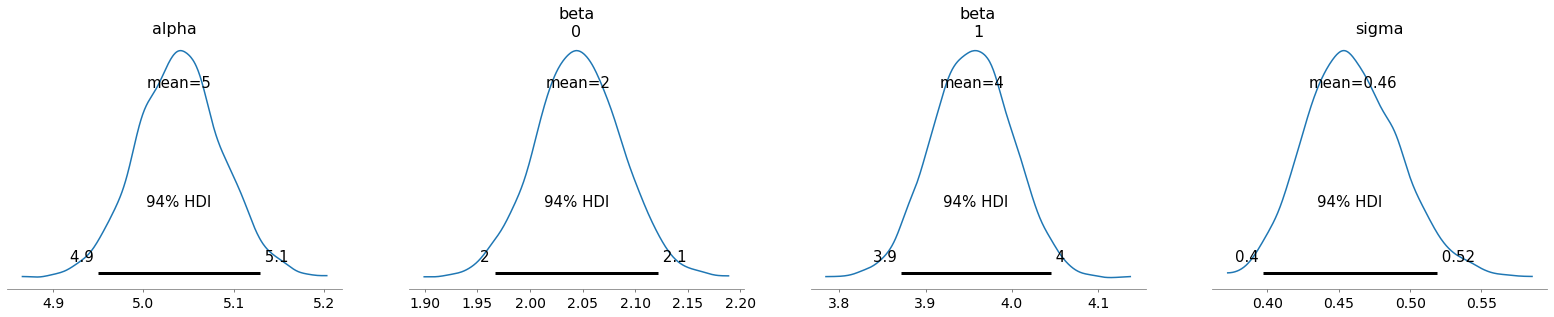

In [53]:
az.plot_posterior(LR_arviz, var_names=['alpha', 'beta', 'sigma'])

# 2. Logistic Regression

In [124]:
x = np.random.randn(500,2)
f = 2 + 2 * x[:,0] + 3 * x[:,1]
N, K = x.shape

In [125]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
f = sigmoid(f)

from scipy.stats import bernoulli
y = bernoulli.rvs(f)

In [126]:
data = {'N': N, 'K': K, 'y': y, 'x': x}

In [127]:
stan_path = str('/Users/skim/Desktop/Code/git/stan-models')

Logistic_stan = os.path.join(stan_path, 'logistic_regression.stan')
Logistic_model = CmdStanModel(stan_file=Logistic_stan)
Logistic_model.name
Logistic_model.stan_file
Logistic_model.exe_file
Logistic_model.code()

Logistic_fit = Logistic_model.sample(data=data, show_progress =True, output_dir='/Users/skim/Desktop/Code/git/stan-models/output')

INFO:cmdstanpy:compiling stan file /Users/skim/Desktop/Code/git/stan-models/logistic_regression.stan to exe file /Users/skim/Desktop/Code/git/stan-models/logistic_regression
INFO:cmdstanpy:compiled model executable: /Users/skim/Desktop/Code/git/stan-models/logistic_regression
INFO:cmdstanpy:CmdStan start procesing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


In [128]:
Logistic_arviz = az.from_cmdstanpy(
    posterior= Logistic_fit,
    observed_data={"y": y},
    log_likelihood="log_lik"
)

array([<AxesSubplot:title={'center':'alpha'}>,
       <AxesSubplot:title={'center':'beta\n0'}>,
       <AxesSubplot:title={'center':'beta\n1'}>], dtype=object)

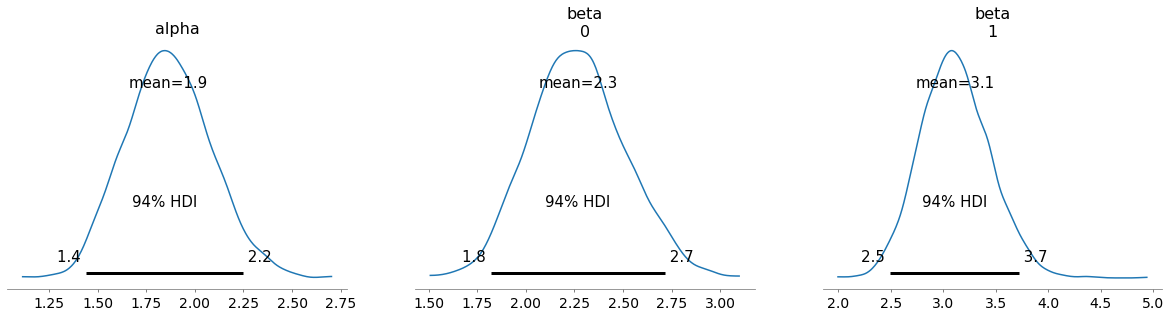

In [129]:
az.plot_posterior(Logistic_arviz, var_names=['alpha', 'beta'])